In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", palette="coolwarm")
%matplotlib inline

In [2]:
ckb = pd.read_csv('ckb-usd-max.csv')
ckb['snapped_at']= pd.to_datetime(ckb['snapped_at'])

In [3]:
ckb.tail(10)

,snapped_at,price,market_cap,total_volume
473,2021-03-04 00:00:00+00:00,0.011505,2.774608e+08,2.245215e+07
474,2021-03-05 00:00:00+00:00,0.010453,2.521798e+08,2.059163e+07
475,2021-03-06 00:00:00+00:00,0.010285,2.486996e+08,2.182622e+07
476,2021-03-07 00:00:00+00:00,0.010706,2.613427e+08,2.035548e+07
477,2021-03-08 00:00:00+00:00,0.010935,2.630866e+08,1.457361e+07
478,2021-03-09 00:00:00+00:00,0.010659,2.583787e+08,1.825116e+07
479,2021-03-10 00:00:00+00:00,0.012128,2.940892e+08,3.163108e+07
480,2021-03-11 00:00:00+00:00,0.013341,3.235283e+08,5.899910e+07
481,2021-03-12 00:00:00+00:00,0.015555,3.744030e+08,9.681809e+07
482,2021-03-13 00:00:00+00:00,0.016617,4.010226e+08,6.214526e+07


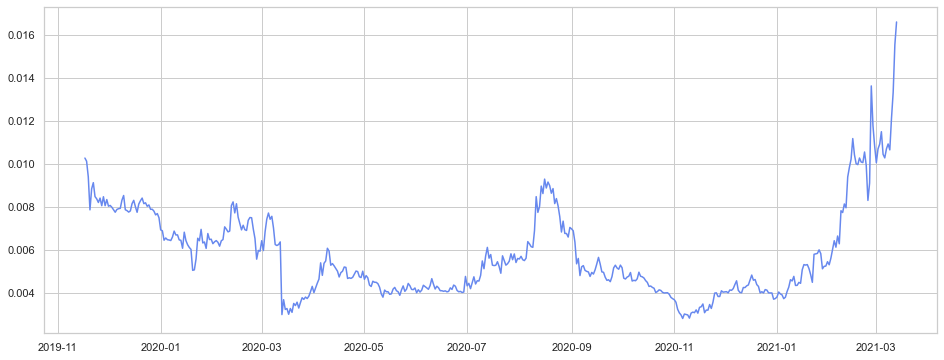

In [4]:
plt.figure(figsize=(16,6))
plt.plot(ckb['snapped_at'],ckb['price'])

<AxesSubplot:>

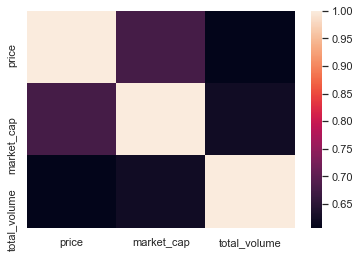

In [5]:
sns.heatmap(ckb.corr())

In [6]:
ckb.columns

Index(['snapped_at', 'price', 'market_cap', 'total_volume'], dtype='object')

In [20]:
X = ckb[['market_cap', 'total_volume']]

In [21]:
y = ckb['price']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101);

In [24]:
X_test.shape[0]

194

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
print(lm.intercept_)

0.0032417746936170893


In [29]:
print(lm.coef_)

[2.12870387e-11 3.95321127e-11]


In [31]:
coefs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])

In [32]:
coefs

,Coefs
market_cap,2.128704e-11
total_volume,3.953211e-11


In [33]:
predict = lm.predict(X_test)

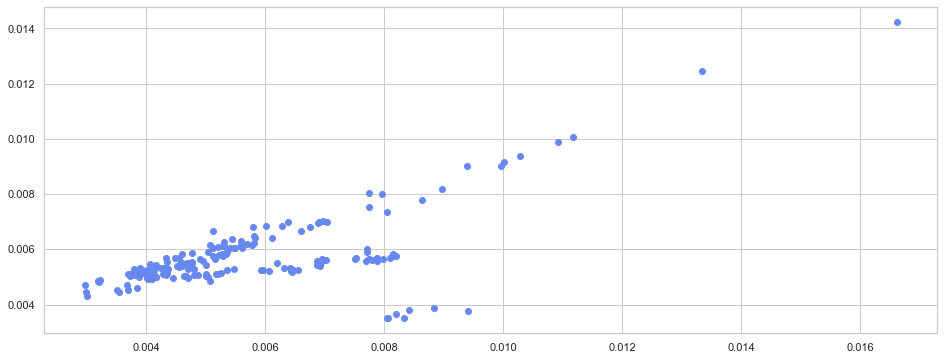

In [36]:
plt.figure(figsize=(16,6))
plt.scatter(y_test, predict)

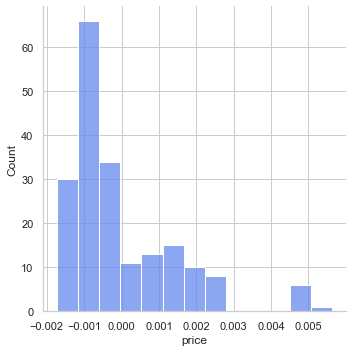

In [39]:
sns.displot((y_test-predict))

In [40]:
from sklearn import metrics

In [41]:
print('MAE', metrics.mean_absolute_error(y_test, predict))

MAE 0.001119282503880915


In [42]:
print('MSE', metrics.mean_squared_error(y_test, predict))

MSE 2.0634840122330775e-06


In [43]:
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

RMSE 0.001436483209868141


In [ ]:
######################